In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise: Thompson sampling for a 5-armed bandit with Gaussian rewards

In this exercise, you will derive a Thompson sampling algorithm for the 5-armed bandit problem with Bernoulli distributed rewards. We will use bandits with the following reward distributions, so that $$
R_t\mid A_t=k \thicksim Bern(\mu_k).
$$
In other words, if we take action $k$, where $k\in\{1,2,3,4,5\}$ at time $t$, then we will receive a reward drawn from a Bernoulli distribution with mean $\mu_k$.

Below, we will use the prior distribution $\mu_k\thicksim Unif(0, 1)$.

The first two questions will be mathematical derivations for parts of the sampling routine. Then, we will move on to simulating the bandit to see if it works!

## Deriving Thompson sampling

Question 1: Normal-normal posterior with known variances

Let $X\thicksim Beta(\alpha, \beta)$ be a Beta distributed random variable. Let $Y$ be Bernoulli distributed with mean $X$, i.e., $Y\mid X=x\thicksim Bern(x)$.

If we observe $Y=y$, what is the posterior distribution of $X$ given $Y=y$? Hint: use Bayes rule.

> Answer 1:

Question 2: Updating the posterior in Thompson sampling

In Thompson sampling, after taking action $A_t=a_t$, we must update the posterior distribution for the bandit's $a_t$th arm. In this case, that means updating our posterior distribution for $\mu_k$.

 1. Say that at iteration $t-1$, our posterior distribution for $\mu_k$ is $Beta(m_k(t-1),s^2_k(t-1))$. What is the posterior distribution of $\mu_k$ at step $t$, after taking action $A_t=k$ and observing $R_t=r_t$? You should phrase your answer in terms of $m_k(t-1)$ and $s^2_k(t-1)$.
 2. What is the posterior distribution of $\mu_k$ after taking action $A_t=a_t$, where $a_t\neq k$?

Hint: use your answer from Question 1.

Answer 2:

Question 3: Selecting the play

In Thompson sampling, we select our ``play'' or action $A_t$ according to our posterior distribution: select $A_t=k$ with probability equal to our current (posterior) probability that $k$ is the best action.

Based on the Bernoulli example from lecture, derive a method for picking $A_t$, and show that it chooses $A_t=k$ with probability equal to $$P(\mu_k > \mu_i\text{ for all }i\neq k \mid R_1,\dots,R_{t-1},A_1,\dots,A_{t-1}).$$

> Answer 3:

## Simulation

## Reproducible random number generation in NumPy

First, a brief refresher on sampling random variables in NumPy. Of course, you have all done this before, but here is a tutorial in the best practice for reproducible random number generation using NumPy's latest tools. Here, "reproducible" means that the simulation will generate the same results across different runs, which is an important tool to have in your data science toolbox when you want to share results that others can replicate!

In [3]:
# here, we instantiate a random generator, which can be used
# to sample random variables
# this is a Generator object, see: https://numpy.org/doc/stable/reference/random/generator.html
# Notice that we set the seed here. This means that
# repeated runs of this notebook will have the same
# behavior.
rg = np.random.default_rng(0)

The most important thing to notice above is that the `scale` parameter is the standard deviation, not the variance!

Below, please use `rg` to draw your random numbers. The documentation for the `normal` function is here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

Question 4: coding up a bandit simulation

The following code stencil will help you to write a function which simulates the Thompson sampling algorithm derived in Questions 1-3.

In [4]:
### SOLUTION to Question 4

# parameters
n_iter = 10000

# define the true parameters of the bandit
# this is the truth that we want to learn below!
mu = rg.uniform(low=0.0, high=1.0, size=5)

# setup
# These arrays will store the parameters of the current
# posterior distribution for mu. Initialize them according
# to the prior above.
alpha_t = np.ones(5)
beta_t = np.ones(5)

# bandit loop
rewards_t = []
regrets_t = []
# kl_t =[]
for t in range(n_iter):
    # 4.a
    # -- pick an action
    # Take as many lines as you need to implement the strategy
    # derived in question 3.
    mu_samples = []
    for i in range(5):
        mu_samples.append(rg.beta(a = alpha_t[i], b = beta_t[i]))
    a_t = np.argmax(mu_samples)

    # 4.b
    # -- get a reward
    # Sample r_t from the bandit arm corresponding to the action a_t
    r_t = rg.binomial(n=1, p = mu[a_t])
    
    # 4.c
    # -- update posterior
    # Update the posterior for the bandit arm corresponding to the action a_t
    for i in range(5):
        if i == a_t:
            alpha_t[i] = alpha_t[i]+r_t
            beta_t[i] = beta_t[i]+1-r_t
            

    # 4.d
    # -- compute regret
    # Compute the regret from the previous iteration, and assign it
    # to the variable `regret`
    # Your code here
    regret = mu.max()- mu[a_t]
    # if regret == 0:
    #   kl_t.append(0)
    # else:
    #   kl = mu[a_t]*np.log(mu[a_t]/mu.max())+(1-mu[a_t])*np.log((1-mu[a_t])/(1-mu.max()))
    #   kl_t.append(kl)

    # -- track performance
    # Let's keep track of the reward received at each iteration
    # so that we can plot it below.
    rewards_t.append(r_t)
    regrets_t.append(regret)

Question 5: Plotting the results

(5.a): Plot the average reward $\frac{1}{t}\sum_{i=1}^t r_t$ as a function of $t$

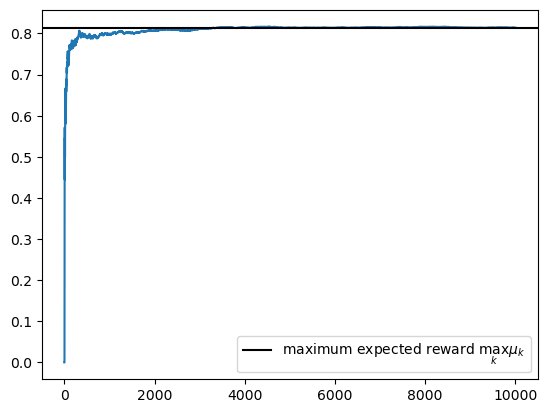

In [69]:
### SOLUTION to 5.a

# 5.a: your code here
# plot the average reward
avg_reward = [rewards_t[0]]
for i in range(1,len(rewards_t)):
    avg_reward.append(np.mean(rewards_t[:i]))
plt.plot(avg_reward)

# here, we will add the maximum expected reward to the plot
# for you to compare against
plt.axhline(mu.max(), color="k", label="maximum expected reward $\\max_k\\mu_k$")
plt.legend();

(5.b) Plot the regret using a logarithmic horizontal axis

In the lecture, it was mentioned that Thompson sampling asymptotically achieves logarithmic total regret. So, if we plot the total regret using a logarithmic horizontal axis, we should expect to see something that *eventually* looks linear (it won't necessarily at the beginning).

Recall, the total regret is the running sum of the regrets at each iteration.

Hint: the function `plt.semilogx()` could help! https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html

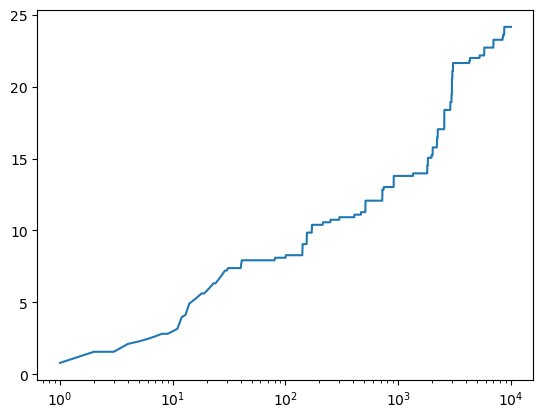

In [76]:
# your code here
total_regret = []
for i in range(1,len(regrets_t)+1):
    total_regret.append(np.sum(regrets_t[:i]))
    
plt.semilogx(np.array(range(n_iter))+1, total_regret)
plt.show()

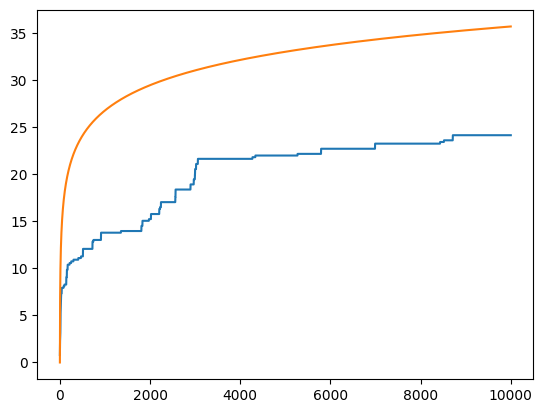

In [ ]:
# Your code here

# Second Part: Gradient bandit

In this exercise, you would implement the gradient bandit algorithm for multi-armed bandit problem. We would use the same problem setup as in the thompson sampling problem.

Instead of learning the value function, the gradient bandit method directly learns the __policy__ $\pi$, which is a distribution over all possible actions. In the multi-armed bandit case, the policy is defined through the preference function $H$ as follows:

$$\pi_H(a) \triangleq Pr(Action = a|H) = \frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}} \qquad  (1)$$

One key observation is that the preference function $H(a)$ is exactly the _logits_ we've seen in previous exercise. In this case, the higher $H(a)$ is relatively to other $H(a')$, the action $a$ is more __preferred__ than other actions $a'$, hence the name __preference__.

## Step 1. The logsumexp trick

Directly computing the probability using eq (1) can result in under- or overflow when exponentiating large values.
The `logsumexp` trick is a numerically stable way to compute the probability given in eq (1):

$$\pi_H(a)= \frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}} = \frac{e^{H(a) - c}}{\sum_{b=1}^k e^{H(b)-c}}$$
where $c = \max_{b=1}^k e^{H(b)}$.

### Question 1

Implement the function below that computes the probability (i.e. policy) from the logits (i.e. preference) using the `logsumexp` trick.

You may use the `scipy.sepcial.logsumexp` function imported below (or not).

In [7]:
from scipy.special import logsumexp

In [8]:
def get_probs(logits):
    ### you code here###
    # expected: 1-3 lines of codes
    # logits is a one-dimensional array, compute the corresponding probability using the logsumexp trick
    c = logits.max()
    probs = np.exp(logits- c-logsumexp(logits-c))
    return probs

In [ ]:
# Solution
from scipy.special import logsumexp
def get_probs(logits):
    ### you code here###
    # expected: 1-3 lines of codes
    # logits is a one-dimensional array, compute the corresponding probability using the logsumexp trick
    logits_max = logits.max()
    logits_ = logits - logits_max
    probs = np.exp(logits_ - logsumexp(logits_))
    return probs

## Step 2. Deriving the gradient bandit

We would first describe the general policy gradient method, and then discuss its application to the multi-armed bandit problem.

The goal of the policy gradient method is to optimize the policy $\pi_H$ such that the expected reward is maximized, i.e. the optimal $\pi^*$ is such that

$$\pi^* = \arg\max_\pi \mathbb{E}_{\pi(a)} [R(a)]  \qquad (2)$$

### Step 2.1 The REINFORCE trick: a general policy gradient method
Suppose the policy $\pi$ is parameterized by $\theta$. The optimization problem (2) is equivalent to the following

$$\theta^* = \arg \max_\theta  \mathbb{E}_{\pi_\theta(a)} [R(a)] \qquad (3)$$

To solve this optimization problem, we could use gradient ascent algorithm. Let's first compute the gradient of the expected reward:

$$\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)] = \nabla_\theta \int \pi_\theta (a) R(a)da $$

To compute this gradient exactly, we would need to integrate over all possible actions (the action space could be inifitely-dimensional, or finite-dimension as in the multi-armed bandit problem in which case the integration becomes a summation, but the dimensions could stil be high). We would like to avoid this integration. The REINFORCE trick shows that
$$\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)] = \mathbb{E}_{\pi_\theta (a)} [R(a) \nabla_\theta \log \pi_\theta(a)] \qquad (5)$$

The implication is that we could obtain a stochastic estimate, and then apply stochastic gradient ascent. That is, randomly sample an action $a$ from $\pi_\theta$, and then obtain a stochastic gradient $R(a) \nabla_\theta \log \pi_\theta(a)$, which is an unbiased estimate of the true exact gradient $\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)]$.


### Question 2: Prove the REINFORCE trick eq (5).

Hint: Use $\frac{d}{dx} \log f(x) = \frac{1}{f(x)} \frac{d f(x)}{dx}$.

### YOUR ANSWER HERE ###

Answer:

### Introducing the baseline

Despite the REINFORCEMENT trick is computationally favorable, it also comes with high variance. One way to reduce the variance of the stochastic gradient estimate is to introduce a baseline $B$ which does not depend on the action: instead of using $R(a) \nabla_\theta \log \pi_\theta(a)$ as the stochastic gradient estimate, we use $(R(a) - B) \nabla_\theta \log \pi_\theta(a)$.

### Question 3

To justify the use of baseline, we need to make sure the new gradient estimate is also unbiased, i.e. show the following

$$  \mathbb{E}_{\pi_\theta (a)} [R(a) \nabla_\theta \log \pi_\theta(a)]  = \mathbb{E}_{\pi_\theta (a)} [(R(a)  - B ) \nabla_\theta \log \pi_\theta(a)]  \qquad (6) $$

Hint: (1) Use $\frac{d}{dx} \log f(x) = \frac{1}{f(x)} \frac{d f(x)}{dx}$, (2) exchange gradient with the integral, and (3) remember any probability distribution $\pi_\theta $ integrates to 1.

### YOUR ANSWER HERE ###

Answer:

### Step 2.2 Applying to the multi-armed bandit problem.

Let's get back to the multi-armed bandit setting. In this case, the policy $\pi$ is parameterized by the preference vector $H$, i.e. $\pi = \pi_H$. The task is this step is to compute the gradient.

In principle, we could use any autodiff method we've learned before to automatically compute $\nabla_H \log \pi_H$. However, we would work out the analytical expression for multi-armed bandit this time.

### Question 4
Show that

$$\frac{\partial \log \pi_H (A)}{\partial H(a)} = \mathbb{1}\{A=a\} - \pi_H(a)\qquad (7)$$
where we recall that $\pi_H$ is computed using $H$ in eq (1).

### YOUR ANSWER HERE ###

Answer:

### Step 2.3 Instantiating the gradient ascent rule

Having derived the gradient estimate, we can now write down the update rule for the preference parameter using the gradient ascent method:

$$H_{t+1}(a) \leftarrow H_t(A_t) + \alpha (R_t - B_t) (\mathbb{1} \{A_t = a\} -\pi_t(a)), \forall a  \qquad (8)$$

where $A_t, R_t, B_t$ are the action, reward and baseline at iteration $t$, and $\alpha$ is the learning rate.  

### Step 3. Implement the gradiant bandit.

### Question 5

In the following code, implement the gradient bandit problem. Use the average reward $\bar R_t$ as baseline. More specifically, when $t=0$, set $\bar R_t = 0$. When $t \geq 1$, set $\bar R_t =\frac{1}{t} \sum_{i=0}^{t-1} R_i$.

In [43]:
def gradient_bandit(n_iter, H_init, alpha, use_baseline=False):
    H_t = H_init
    K = H_init.shape[0]

    rewards = []
    regrets = []
    actions = []
    Hs = []

    baseline = 0

    for t in range(n_iter):
        # 5.a
        # compute the policy and then sample an action from the policy
        ### YOUR CODE HERE####
        # expected two lines of codes
        pi_t = get_probs(H_t)
        a_t = np.random.choice(a = K, p = pi_t)
        ######################
        actions.append(a_t)

        if use_baseline and t >= 1:
          # 5.b
          # update the baseline
          ### YOUR CODE HERE ###
          # expected 1 line of code
            baseline = np.mean(rewards)
          ######################

        # 5.c
        # get a reward
        # Sample r_t from the bandit arm corresponding to the action a_t
        ### YOUR CODE HERE ###
        r_t = rg.binomial(n=1, p = mu[a_t])
        ######################

        # 5.d
        # update policy
        ### YOUR CODE HERE ###
        # expected 3-6 lines of codes
        for i in range(K):
            if i==a_t:
                H_t[i] = H_t[i]+ alpha* (r_t-baseline)* (1-get_probs(H_t)[i])
            else:
                H_t[i] = H_t[i]+ alpha* (r_t-baseline)* (-get_probs(H_t)[i])
        ######################
#         print(H_t)
        Hs.append(H_t)

        # 5.e
        # -- compute regret
        # Compute the regret from the previous iteration, and assign it
        # to the variable `regret`
        ### Your code here ###
        regret = mu.max()-mu[a_t]
        ######################

        # -- track performance
        # Let's keep track of the reward received at each iteration
        # so that we can plot it below.
        rewards.append(r_t)
        regrets.append(regret)

    return H_t, pi_t, rewards, regrets, actions

In [44]:
n_iter = 1000
alpha  = 0.1
H_nobaseline, pi_nobaseline, rewards_nobaseline, regrets_nobaseline, actions_nobaseline = gradient_bandit(n_iter, np.zeros(5), alpha, use_baseline=False)
H_baseline, pi_baseline, rewards_baseline, regrets_baseline, actions_baseline = gradient_bandit(n_iter, np.zeros(5), alpha, use_baseline=True)

You can view the final policies as below.

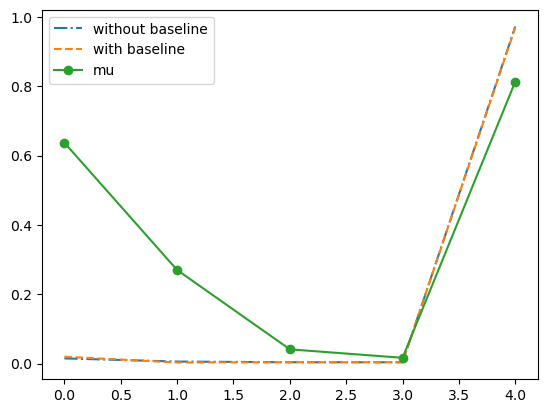

In [45]:
plt.plot(pi_nobaseline,'-.', label='without baseline')
plt.plot(pi_baseline,'--', label='with baseline')
plt.plot(mu, '-o', label='mu')
plt.legend()

### Question 6

Plotting the results as you did for thompson sampling problem.

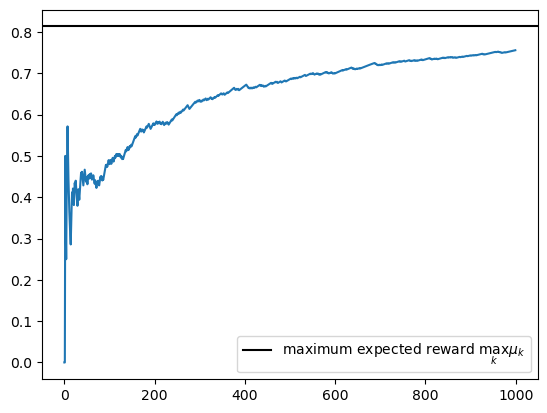

In [68]:
### YOUR CODE HERE ###

# 6.a: plot the average reward
avg_reward2 = [rewards_baseline[0]]
for i in range(1,len(rewards_baseline)):
    avg_reward2.append(np.mean(rewards_baseline[:i]))
plt.plot(avg_reward2)
# here, we will add the maximum expected reward to the plot
# for you to compare against
plt.axhline(mu.max(), color="k", label="maximum expected reward $\\max_k\\mu_k$")
plt.legend();

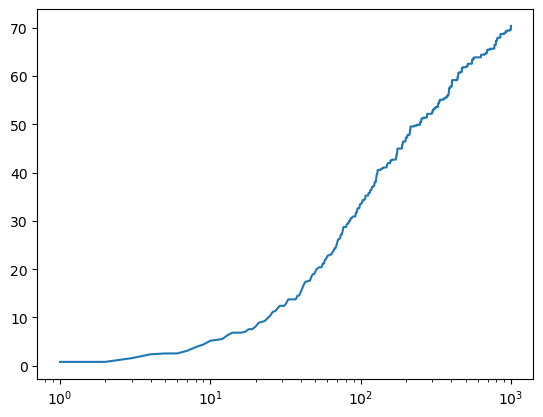

In [75]:
# 6.b plot the cumulative regrets
total_regret2 = []
for i in range(1,len(regrets_baseline)+1):
    total_regret2.append(np.sum(regrets_baseline[:i]))
    
plt.semilogx(np.array(range(1000))+1, total_regret2)
plt.show()

# Third part:$ɛ$-greedy:
## Problem: implement the $ɛ$-greedy and compare it with the Thompson sampling and gradient method.

## Part 1: Implement the $ɛ$ greedy

In [60]:
class EpsilonGreedyBernoulliBandit:
    def __init__(self, k=5, epsilon=0.1):
        self.k = k  # Number of arms
        self.epsilon = epsilon
        self.counts = np.zeros(k)  # Count of selections for each arm
        self.values = np.zeros(k)  # Estimated success probability of each arm
    ## Finish the exploration and exploitation
    def choose_arm(self):
        if self.epsilon > np.random.rand():
            return np.random.choice(self.k)
        else:
            return np.argmax(self.values)    


    ## Update estimate of this arm's success probability
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] +=1
        alpha = 1 / self.counts[chosen_arm]
        self.values[chosen_arm] += alpha * (reward - self.values[chosen_arm])


def simulate_bandits(trials, epsilon, mu_values):
    bandit = EpsilonGreedyBernoulliBandit(k=arms, epsilon=epsilon)
    rewards = np.zeros(trials)
    regret = np.zeros(trials)
    best_arm_reward = np.max(mu_values)  # Maximum success probability among all arms
    # expected_best_reward = best_arm_reward * trials  # If the best arm was always chosen
    # actual_reward = 0

    for i in range(trials):
        chosen_arm = bandit.choose_arm()
        reward =   np.random.binomial(1, mu_values[chosen_arm])# Bernoulli distributed reward
        bandit.update(chosen_arm, reward)
        rewards[i] = reward
        regret[i] = best_arm_reward - reward
        # actual_reward += reward
    return rewards, regret

## Part 2:  Compare the results

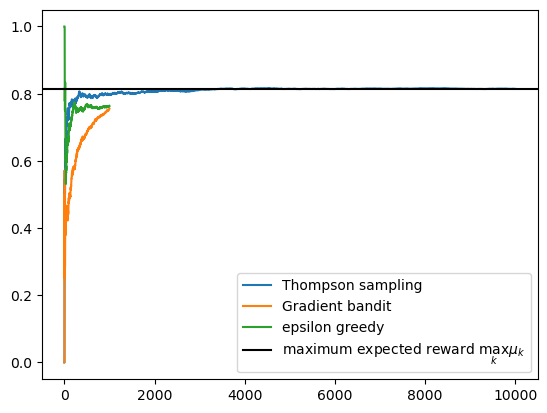

In [78]:
### YOUR CODE HERE ###
trials, epsilon = 1000, 0.1
rewards, regret = simulate_bandits(trials, epsilon, mu)
#  plot the average reward and compare with the previous ones
avg_reward3 = [rewards[0]]
for i in range(1,len(rewards)):
    avg_reward3.append(np.mean(rewards[:i]))
plt.plot(avg_reward, label = "Thompson sampling")
plt.plot(avg_reward2, label = "Gradient bandit")
plt.plot(avg_reward3, label = "epsilon greedy")
# here, we will add the maximum expected reward to the plot
# for you to compare against
plt.axhline(mu.max(), color="k", label="maximum expected reward $\\max_k\\mu_k$")
plt.legend();

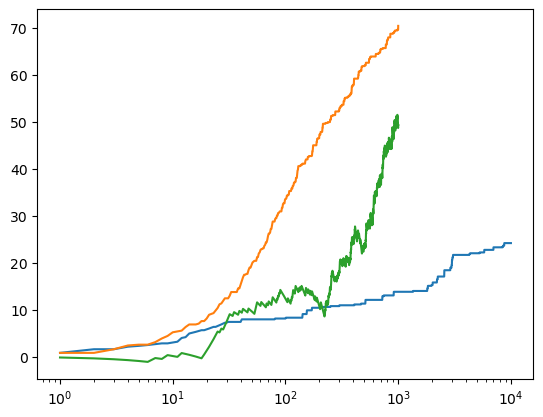

In [80]:
# plot the cumulative regrets and compare with the previous ones
total_regret3 = []
for i in range(1,len(regret)+1):
    total_regret3.append(np.sum(regret[:i]))
    
plt.semilogx(np.array(range(10000))+1, total_regret, label = "Thompson sampling")
plt.semilogx(np.array(range(1000))+1, total_regret2, label = "Gradient bandit")
plt.semilogx(np.array(range(1000))+1, total_regret3, label = "epsilon greedy")
plt.show()

#####  We see that by using Thompson sampling, reward converges to the maximum expected reward with least iteration and regret has minimum value compared with other two methods.  